In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def plot(ax, items, title, y_label, x_label):
    labels = list()
    for label, item in items.items():
        ax.plot(item)
        labels.append(label)

    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.legend(labels, loc='upper left')

In [3]:
"""
section = "vsrtvy"
path = "models/pytorch/{}/stats.csv"

filenames = [
    path.format("exp_01-baseline"),
    path.format("exp_02-2_layers"),
    path.format("exp_03-4_layers"),
    path.format("exp_04-5_layers"),
]

names = [
    "výchozí model",
    "2 skryté vrstvy",
    "4 skryté vsrtvy",
    "5 skrytých vrstev",
]
"""

'\nsection = "vsrtvy"\npath = "models/pytorch/{}/stats.csv"\n\nfilenames = [\n    path.format("exp_01-baseline"),\n    path.format("exp_02-2_layers"),\n    path.format("exp_03-4_layers"),\n    path.format("exp_04-5_layers"),\n]\n\nnames = [\n    "výchozí model",\n    "2 skryté vrstvy",\n    "4 skryté vsrtvy",\n    "5 skrytých vrstev",\n]\n'

In [4]:
"""
section = "okoli"
path = "models/pytorch/{}/stats.csv"

filenames = [
    path.format("exp_01-baseline"),
    path.format("exp_05-margin_5"),
    path.format("exp_06-margin_15"),
    path.format("exp_07-margin_30"),
    path.format("exp_08-margin_50"),
]

names = [
    "výchozí model",
    "velikost okolí 5",
    "velikost okolí 15",
    "velikost okolí 30",
    "velikost okolí 50",
]
"""

'\nsection = "okoli"\npath = "models/pytorch/{}/stats.csv"\n\nfilenames = [\n    path.format("exp_01-baseline"),\n    path.format("exp_05-margin_5"),\n    path.format("exp_06-margin_15"),\n    path.format("exp_07-margin_30"),\n    path.format("exp_08-margin_50"),\n]\n\nnames = [\n    "výchozí model",\n    "velikost okolí 5",\n    "velikost okolí 15",\n    "velikost okolí 30",\n    "velikost okolí 50",\n]\n'

In [5]:
"""
section = "sirka"
path = "models/pytorch/{}/stats.csv"

filenames = [
    path.format("exp_01-baseline"),
    path.format("exp_09-width_16"),
    path.format("exp_10-width_64"),
    path.format("exp_11-width_256"),
    path.format("exp_12-width_512"),
]

names = [
    "výchozí model",
    "šířka vrstev 16",
    "šířka vrstev 64",
    "šířka vrstev 256",
    "šířka vrstev 512",
]
"""

'\nsection = "sirka"\npath = "models/pytorch/{}/stats.csv"\n\nfilenames = [\n    path.format("exp_01-baseline"),\n    path.format("exp_09-width_16"),\n    path.format("exp_10-width_64"),\n    path.format("exp_11-width_256"),\n    path.format("exp_12-width_512"),\n]\n\nnames = [\n    "výchozí model",\n    "šířka vrstev 16",\n    "šířka vrstev 64",\n    "šířka vrstev 256",\n    "šířka vrstev 512",\n]\n'

In [6]:

section = "snizeni"
path = "models/pytorch/{}/stats.csv"

filenames = [
    path.format("exp_01-baseline"),
    path.format("exp_13-4_emotions"),
    path.format("exp_14-3_emotions"),
]

names = [
    "výchozí model",
    "3 emoce",
    "4 emoce",
]

In [7]:
experiments = []

for filename in filenames:
    exp = pd.read_csv(filename)
    experiments.append(exp)

In [8]:
train_losses = {}
val_losses = {}

train_frame_acc = {}
val_frame_acc = {}

In [9]:
len(experiments)

3

In [10]:
for name, exp in zip(names, experiments):
    train_frame_acc[name] = list(exp['frame acc train: anglický'])
    val_frame_acc[name] = list(exp['frame acc val: anglický'])
    
    train_losses[name] = list(exp['losses train: anglický'])
    val_losses[name] = list(exp['losses val: anglický'])

In [11]:
# name = '2 vrstvy'
# print("val loss ", val_losses[name][-1])
# print("train loss ", train_losses[name][-1])
# print("val frame acc ", val_frame_acc[name][-1])
# print("train frame acc", train_frame_acc[name][-1])

In [12]:
val_losses.keys()

dict_keys(['výchozí model', '3 emoce', '4 emoce'])

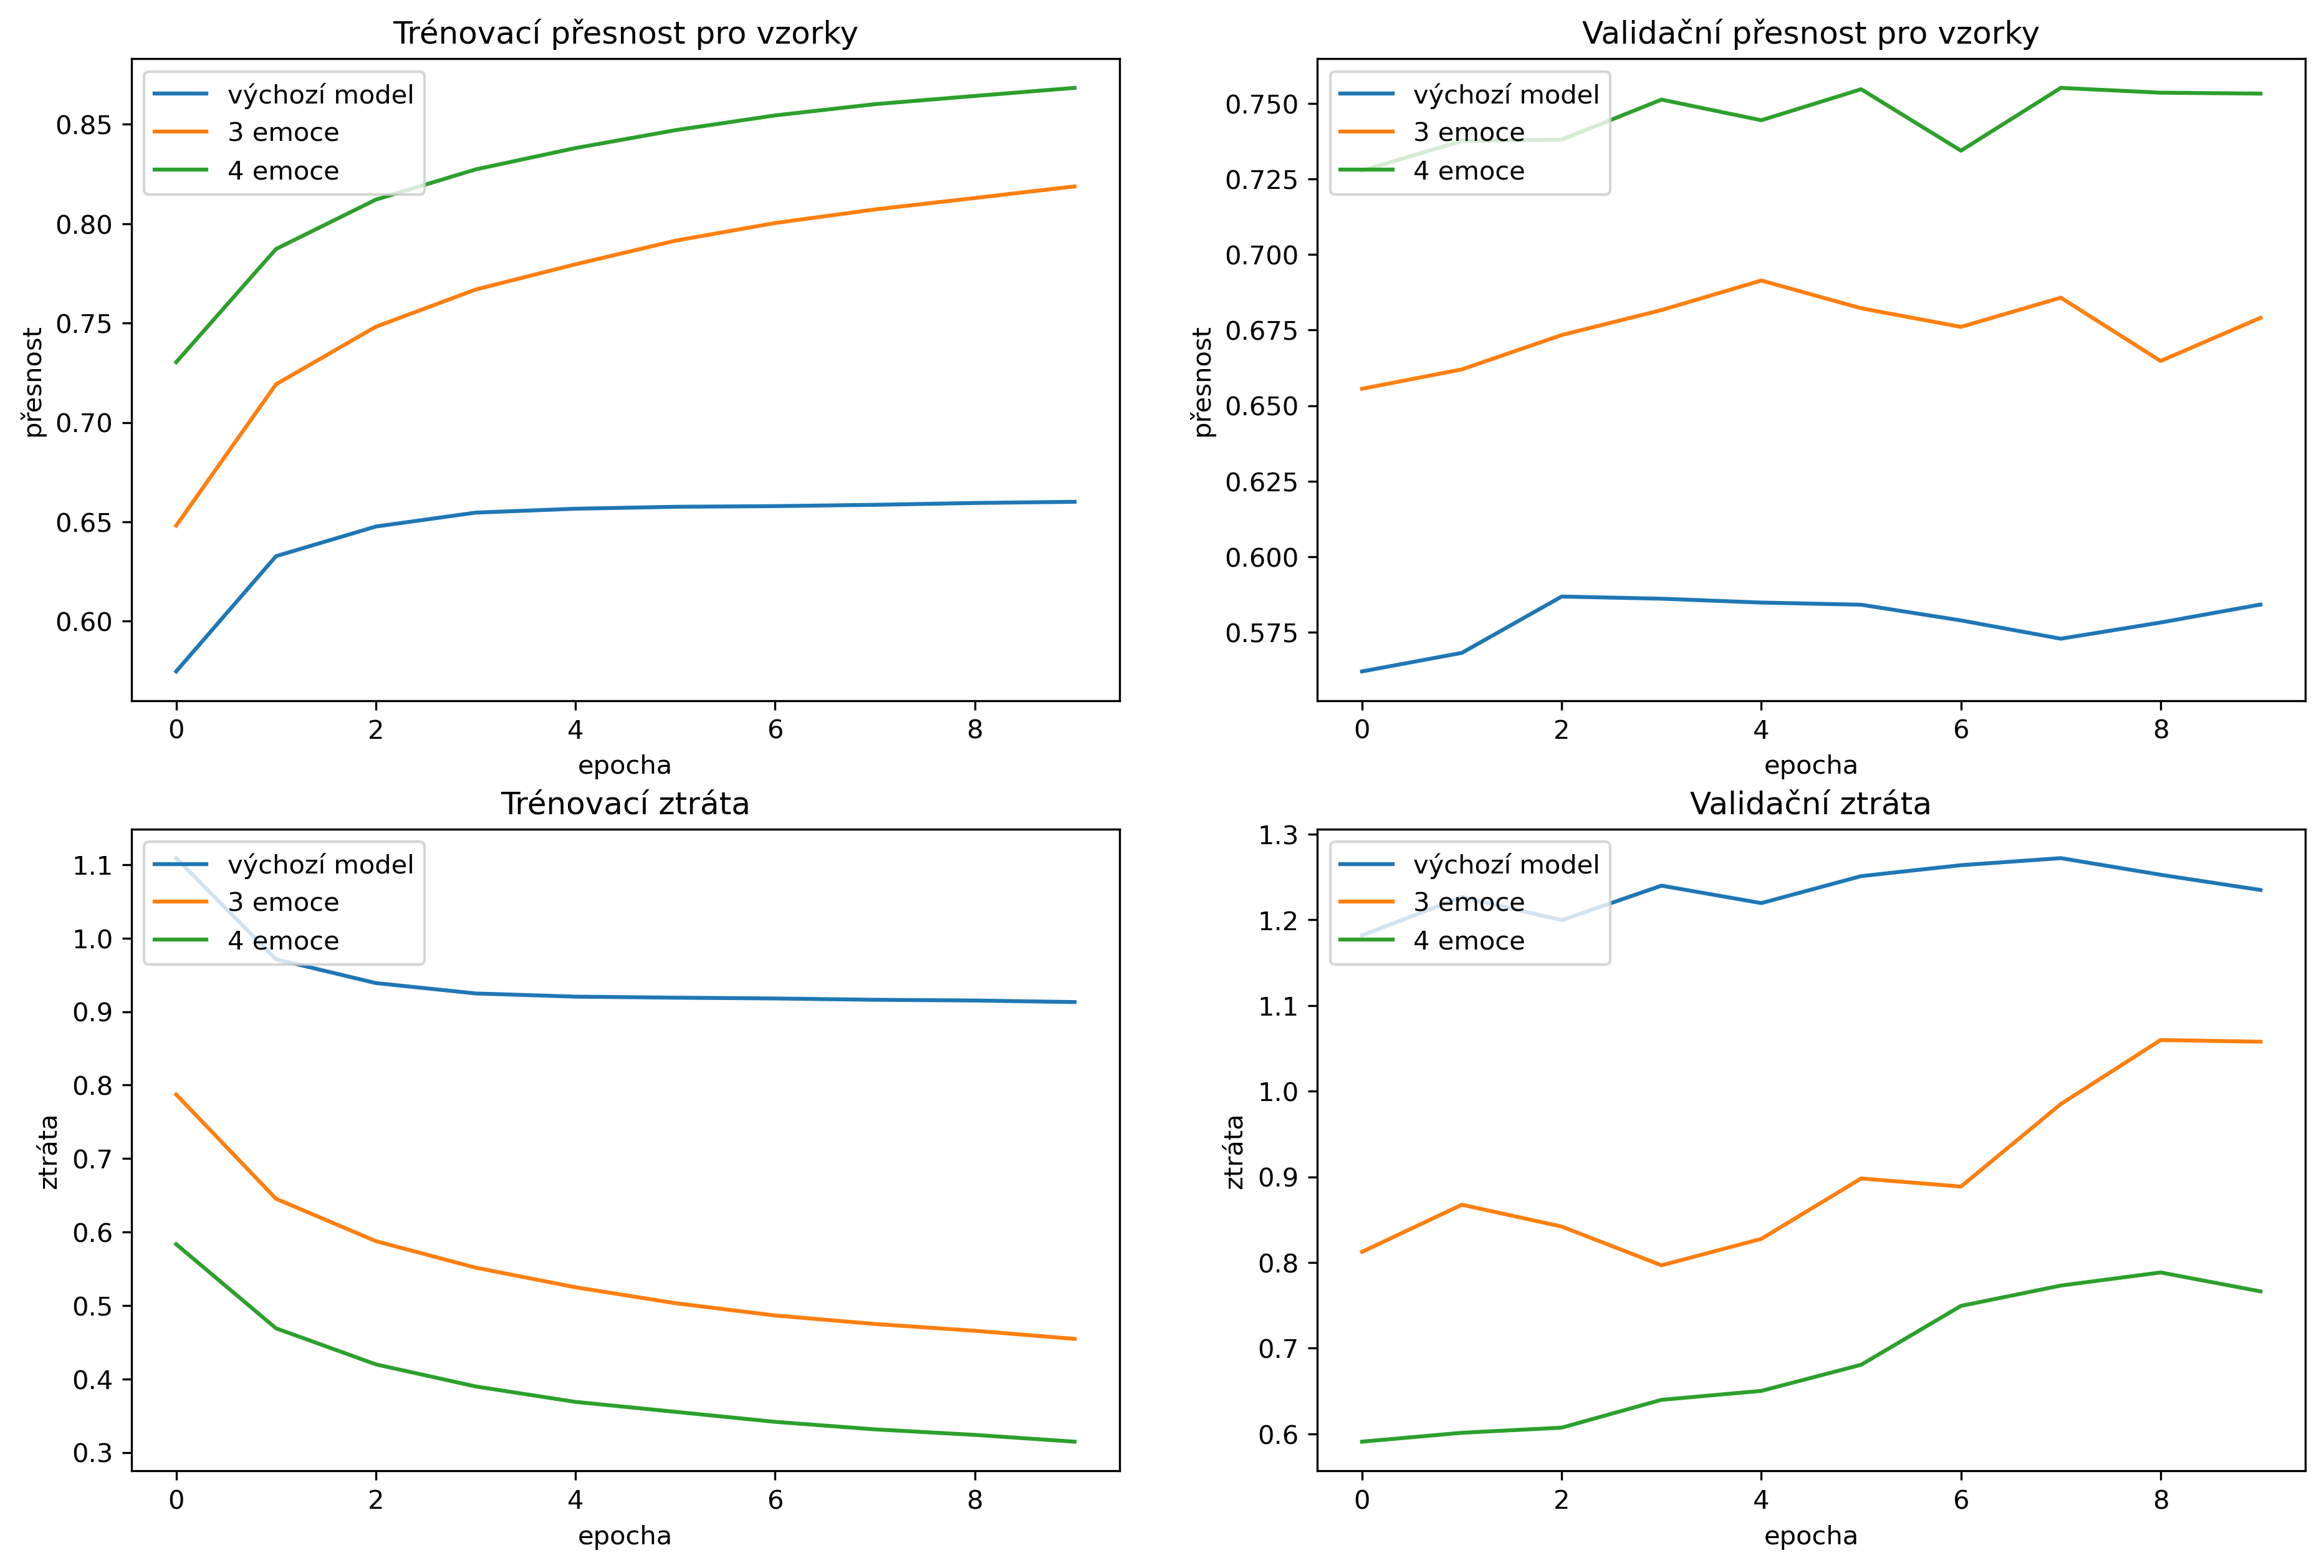

In [13]:
empty = "#"
titles = [
    "Trénovací přesnost pro vzorky",
    "Validační přesnost pro vzorky",
    "Trénovací ztráta",
    "Validační ztráta",
]

y_labels = [
    "přesnost",
    "přesnost",
    "ztráta",
    "ztráta",
]

items = [
    train_frame_acc,
    val_frame_acc,
    train_losses,
    val_losses,
]

n_rows = 2
n_cols = 2
dpi = 300
final_fig , axes = plt.subplots(n_rows, n_cols, dpi=dpi)
final_fig.set_figheight(10)
final_fig.set_figwidth(15)

for row in range(n_rows):
    for col in range(n_cols):
        ax = axes[row][col]
        
        index = row * n_cols + col
        title = titles[index]
        
        if title == empty:
            final_fig.delaxes(axes[row][col])
            continue
        
        item = items[index]
        
        y_label = y_labels[index]
        
        plot(ax, item, title, y_label, "epocha")

In [14]:
dirname = "/Users/tomaspetricek/TUL/TUL_2020:21/BP/Speech_Emotion_Recognition/Attachments/"
title = "prubeh_trenovani_sekce_{}".format(section)
filename = title + ".png"
path = os.path.join(dirname, filename)
final_fig.savefig(path, dpi=dpi)